<a href="https://colab.research.google.com/github/elvispletsch/bibliotecapandas/blob/main/Case_2_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [40]:
vendas = pd.read_excel("varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [41]:
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [5]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [6]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [7]:
vendas["idcanalvenda"]= vendas["idcanalvenda"].str.replace("APP", "Aplicativo")

In [8]:
vendas["Nome_Departamento"]= vendas["Nome_Departamento"].str.replace(" ", "_")

In [9]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [10]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [12]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info

<bound method DataFrame.info of        idcompra idcanalvenda bandeira       Data     Preço  Preço_com_frete  \
0        393835       Mobile        A 2023-03-05  1582.560          791.280   
1        411885       Mobile        A 2023-03-17   679.200          679.200   
2        437305       Mobile        A 2023-03-06    35.920           37.512   
3        440055   Aplicativo        A 2023-01-13  2239.416         2239.416   
4        455795       Mobile        B 2023-03-31  1743.200         1785.112   
...         ...          ...      ...        ...       ...              ...   
80223    636930   Aplicativo        B 2023-04-01   879.200          879.200   
80224    658550   Aplicativo        B 2023-02-18   879.200          879.200   
80225    680170   Aplicativo        B 2023-01-22   879.200          879.200   
80226    701790   Aplicativo        B 2023-02-11   879.200          879.200   
80227    723410   Aplicativo        B 2023-01-27   879.200          879.200   

           Nome_Departamento estado  cliente_Log  
0      Telefones_e_Celulares     SP        15042  
1                    Tablets     SP        17590  
2                      Bebes     SP        15478  
3           TVs_e_Acessorios     SP         2933  
4            Esporte_e_Lazer     RS        19790  
...                      ...    ...          ...  
80223  Telefones_e_Celulares     RJ        15746  
80224  Telefones_e_Celulares     AM          443  
80225  Telefones_e_Celulares     PB         9349  
80226  Telefones_e_Celulares     PB        10944  
80227  Telefones_e_Celulares     PB        22242  

[79926 rows x 9 columns]>

In [14]:
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


nesta etapa, vemos que a coluna de preço possui dados em branco, diferente das outras. Por isso, inserimos a média de preço para os dados ficarem uniformes.

In [15]:
media_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [17]:
vendas[["Preço", "Preço_com_frete"]].describe() #nesta etapa estou pedindo para trazer informações estátisticas da coluna preço e preço com frete

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [20]:
preco_errado = vendas.query("Preço > Preço_com_frete")
vendas_correto = vendas.query("Preço < Preço_com_frete") #precisamos trabalhar com a premissa de que o PREÇO não deve ser maior que o preço frete, logo, vamos eliminar estes.
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [21]:
#construindo a métrica de departamentos mais vendidos
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

Nome_Departamento
Bebes                     4353
Eletrodomesticos          4201
Eletroportateis           2223
Moveis                    2036
Utilidades_Domesticas     1366
Acessorios_e_Inovacoes    1243
Beleza_e_Saude            1054
Brinquedos                 686
Perfumaria                 563
Produtos_de_Limpeza        522
Telefones_e_Celulares      493
Automotivo                 457
Esporte_e_Lazer            446
Audio                      374
Ar_e_Ventilacao            337
Ferramentas                287
Informatica                284
Games                      200
TVs_e_Acessorios           158
Decoracao                  127
Malas_e_Mochilas            91
Cama,_Mesa_e_Banho          71
Tablets                     64
Casa_e_Construcao           58
Relogios                    45
Pet_Shop                    40
Linha_Industrial             9
Cine_e_Foto                  8
Moda                         3
Alimentos                    2
Instrumentos_Musicais        1
Name: idcompra, dtype

In [23]:
#metrica de media de preço por departamento
vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False)

Nome_Departamento
TVs_e_Acessorios          3469.378177
Informatica               2159.782620
Linha_Industrial          2027.106667
Cine_e_Foto               1851.198000
Telefones_e_Celulares     1442.185907
Eletrodomesticos          1400.662596
Esporte_e_Lazer           1123.139383
Tablets                   1100.233625
Games                      942.895360
Instrumentos_Musicais      834.608000
Automotivo                 681.570336
Moveis                     541.026186
Ar_e_Ventilacao            518.794714
Audio                      480.345882
Casa_e_Construcao          433.527724
Pet_Shop                   237.255400
Acessorios_e_Inovacoes     229.136192
Eletroportateis            223.767118
Ferramentas                217.589389
Cama,_Mesa_e_Banho         210.701859
Malas_e_Mochilas           194.258901
Relogios                   186.947733
Brinquedos                 176.447883
Utilidades_Domesticas      155.020223
Decoracao                  144.496252
Bebes                      130.8

In [36]:
#métrica de quantidade de vendas por mês
vendas_correto["mes"] = vendas_correto["Data"].dt.month #cria uma coluna chamada mes, baseado na coluna data que já existe
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False)

<ipython-input-36-fda5634083df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month #cria uma coluna chamada mes, baseado na coluna data que já existe


mes
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

In [45]:
# fazer join (procx) via python
vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596


In [48]:
agg_idcanal_renda = vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").reset_index()
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.851376
1,Internet,8211.844949
2,Mobile,8222.717801


In [50]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


Text(0.5, 1.0, 'Idade média por Bandeira')

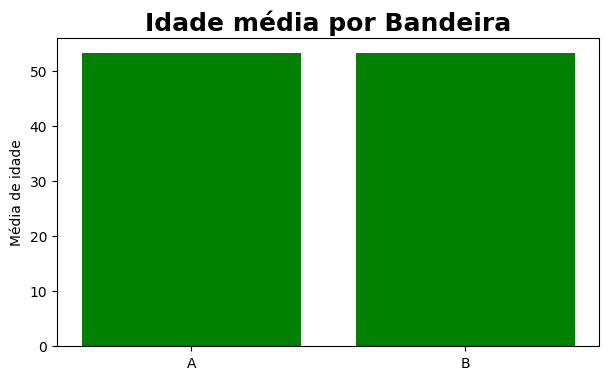

In [57]:
import matplotlib.pyplot as plt ##biblioteca de gráficos
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")
plt.ylabel("Média de idade")
plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold")


Text(0.5, 1.0, 'Renda média por canal de venda')

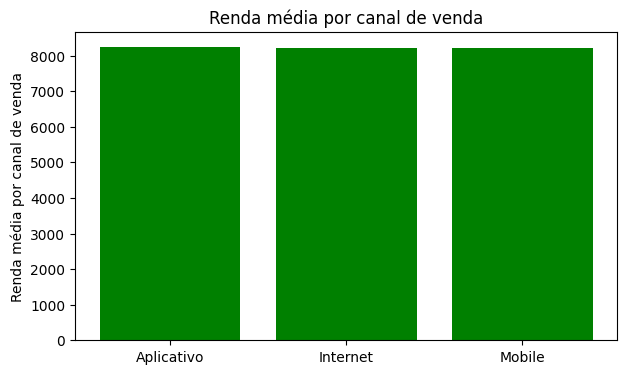

In [58]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")
plt.ylabel("Renda média por canal de venda")
plt.title("Renda média por canal de venda", loc="center")

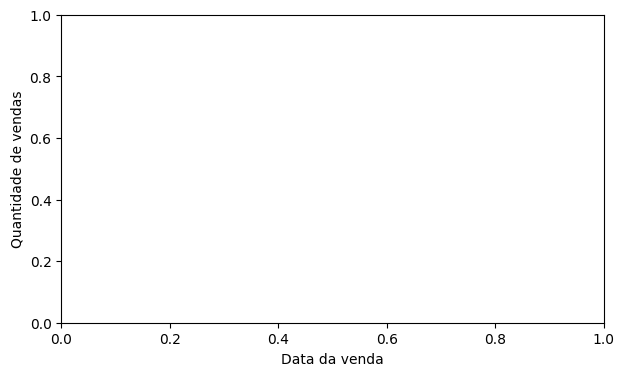

In [60]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = vendas_cliente
